In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from lassolver.utils.func import *
from lassolver.utils.signal import *
from lassolver.utils.utils import *

from lassolver.matrices.iid_gauss import iidGaussian
from lassolver.matrices.uni_invar import UniInvar

from lassolver.dsolver.d_oamp import D_OAMP

# 数値実験の設定

In [5]:
N = 1000  # 列数
alpha = 0.5  # 圧縮率
M = int(alpha*N)  # 行数
rho = 0.2  # 非零成分の割合

In [6]:
SNR = 60  # 信号対雑音比
kappa = 5  # 条件数
Ps = [1, 5, 10, 50, 100, 500]  # ノード数
T = 30  # 反復回数
sim = 100  # 実験数

In [7]:
x = [bernouli_gaussian(N, rho) for _ in range(sim)]
lp = len(Ps)
color = ['tab:blue', 'tab:orange', 'tab:red', 'tab:green', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:cyan']

# i.i.d.ガウス行列での信号再構成

In [8]:
MSE_iidG_doamp = np.empty((sim, lp, T+1))
CommCost_iidG_doamp = np.empty((sim, lp, T))

In [9]:
for i in tqdm(range(sim)):
    iidG = iidGaussian(M, N, m=0, v=1/M)

    doamp = [D_OAMP(iidG.A, x[i], SNR, P) for P in Ps]

    for j in range(lp):
        doamp[j].estimate(T)
        MSE_iidG_doamp[i, j] = doamp[j].mse
        CommCost_iidG_doamp[i, j] = doamp[j].communication_cost

  1%|          | 1/100 [6:34:24<650:45:55, 23664.20s/it]


KeyboardInterrupt: 

In [27]:
MSE_iidG_doamp_mean = np.empty((lp, T+1))
CommCost_iidG_doamp_mean = np.empty((lp, T))

for i in range(lp):
    MSE_iidG_doamp_mean[i] = np.mean(MSE_iidG_doamp[:, i], axis=0)
    CommCost_iidG_doamp_mean[j] = np.mean(CommCost_iidG_doamp[:, i], axis=0)

In [34]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt.title('Communication Cost(i.i.d. Gaussian)')
for i in range(lp):
	plt_CC(CommCost_iidG_doamp_mean[i], 'D-OAMP p = '+str(Ps[i]), T, N, Ps[i], color[i])
""""
plt_CC(CommCost_iidG_doamp_mean[0], 'D-OAMP P = 1', T, N, Ps[0], 'tab:blue')
plt_CC(CommCost_iidG_doamp_mean[1], 'D-OAMP P = 5', T, N, Ps[1], 'tab:orange')
plt_CC(CommCost_iidG_doamp_mean[2], 'D-OAMP P = 10', T, N, Ps[2], 'tab:red')
plt_CC(CommCost_iidG_doamp_mean[3], 'D-OAMP P = 50', T, N, Ps[3], 'blue')
plt_CC(CommCost_iidG_doamp_mean[4], 'D-OAMP P = 125', T, N, Ps[4], 'black')
plt_CC(CommCost_iidG_doamp_mean[5], 'D-OAMP P = 250', T, N, Ps[5], 'green')
"""
plt.grid()


plt.subplot(122)
plt.title('MSE(i.i.d. Gaussian)')
for i in range(lp):
	plt_MSE(MSE_iidG_doamp_mean[i], 'D-OAMP P = '+str(Ps[i]), T, color[i])
"""
plt_MSE(MSE_iidG_doamp_mean[0], 'D-OAMP P = 1', T, 'tab:blue')
plt_MSE(MSE_iidG_doamp_mean[1], 'D-OAMP P = 5', T, 'tab:orange')
plt_MSE(MSE_iidG_doamp_mean[2], 'D-OAMP P = 10', T, 'tab:red')
plt_MSE(MSE_iidG_doamp_mean[3], 'D-OAMP P = 50', T, 'blue')
plt_MSE(MSE_iidG_doamp_mean[4], 'D-OAMP P = 125', T, 'black')
plt_MSE(MSE_iidG_doamp_mean[5], 'D-OAMP P = 250', T, 'green',)
"""
plt.grid()

/home/kenn/.local/lib/python3.8/site-packages/lassolver/utils/utils.py:19: RuntimeWarning: divide by zero encountered in true_divide
  v = cc.copy() / standard
/home/kenn/.local/lib/python3.8/site-packages/lassolver/utils/utils.py:19: RuntimeWarning: invalid value encountered in true_divide
  v = cc.copy() / standard


ValueError: Invalid RGBA argument: 'tab:black'

<Figure size 1008x396 with 2 Axes>

/home/kenn/.local/lib/python3.8/site-packages/lassolver/utils/utils.py:19: RuntimeWarning: divide by zero encountered in true_divide
  v = cc.copy() / standard
/home/kenn/.local/lib/python3.8/site-packages/lassolver/utils/utils.py:19: RuntimeWarning: invalid value encountered in true_divide
  v = cc.copy() / standard


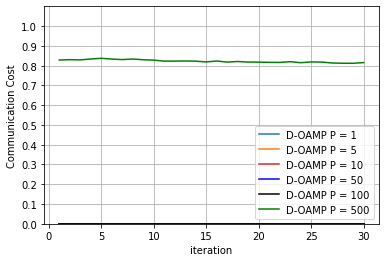

In [29]:
plt_CC(CommCost_iidG_doamp_mean[0], 'D-OAMP P = 1', T, N, Ps[0], 'tab:blue')
plt_CC(CommCost_iidG_doamp_mean[1], 'D-OAMP P = 5', T, N, Ps[1], 'tab:orange')
plt_CC(CommCost_iidG_doamp_mean[2], 'D-OAMP P = 10', T, N, Ps[2], 'tab:red')
plt_CC(CommCost_iidG_doamp_mean[3], 'D-OAMP P = 50', T, N, Ps[3], 'blue')
plt_CC(CommCost_iidG_doamp_mean[4], 'D-OAMP P = 100', T, N, Ps[4], 'black')
plt_CC(CommCost_iidG_doamp_mean[5], 'D-OAMP P = 500', T, N, Ps[5], 'green')
plt.grid()

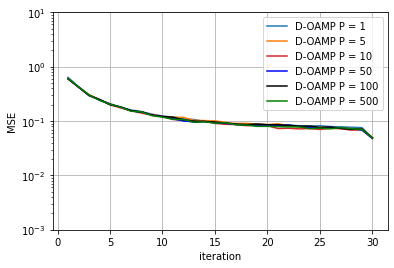

In [30]:
plt_MSE(MSE_iidG_doamp_mean[0], 'D-OAMP P = 1', T, 'tab:blue')
plt_MSE(MSE_iidG_doamp_mean[1], 'D-OAMP P = 5', T, 'tab:orange')
plt_MSE(MSE_iidG_doamp_mean[2], 'D-OAMP P = 10', T, 'tab:red')
plt_MSE(MSE_iidG_doamp_mean[3], 'D-OAMP P = 50', T, 'blue')
plt_MSE(MSE_iidG_doamp_mean[4], 'D-OAMP P = 100', T, 'black')
plt_MSE(MSE_iidG_doamp_mean[5], 'D-OAMP P = 500', T, 'green',)
plt.grid()

# ユニタリ不変行列での信号再構成

In [20]:
MSE_UniInv_oamp = np.empty((sim, 3, T+1))

MSE_UniInv_doampO = np.empty((sim, 3, T+1))
CommCost_UniInv_doampO = np.empty((sim, 3, T))

MSE_UniInv_doampX = np.empty((sim, 3, T+1))
CommCost_UniInv_doampX = np.empty((sim, 3, T))

In [21]:
for i in tqdm(range(sim)):
    UniInv = UniInvar(M, N, kappa)

    oamp = [OAMP(UniInv.A, x[i], SNR) for _ in modes]
    doampO = [D_OAMP(UniInv.A, x[i], SNR, P) for _ in modes]
    doampX = [D_OAMP(UniInv.A, x[i], SNR, P) for _ in modes]

    for j, mode in enumerate(modes):
        oamp[j].estimate(T, ord=mode)
        MSE_UniInv_oamp[i, j] = oamp[j].mse

        doampO[j].estimate(T, ord=mode, approx=True)
        MSE_UniInv_doampO[i, j] = doampO[j].mse
        CommCost_UniInv_doampO[i, j] = doampO[j].communication_cost

        doampX[j].estimate(T, ord=mode)
        MSE_UniInv_doampX[i, j] = doampX[j].mse
        CommCost_UniInv_doampX[i, j] = doampX[j].communication_cost

100%|██████████| 100/100 [16:56:25<00:00, 609.86s/it]


In [36]:
MSE_UniInv_oamp_mean = np.empty((3, T+1))

MSE_UniInv_doampO_mean = np.empty((3, T+1))
CommCost_UniInv_doampO_mean = np.empty((3, T))

MSE_UniInv_doampX_mean = np.empty((3, T+1))
CommCost_UniInv_doampX_mean = np.empty((3, T))

for i in range(3):
    MSE_UniInv_oamp_mean[i] = np.mean(MSE_UniInv_oamp[:, i], axis=0)

    MSE_UniInv_doampO_mean[i] = np.mean(MSE_UniInv_doampO[:, i], axis=0)
    CommCost_UniInv_doampO_mean[i] = np.mean(CommCost_UniInv_doampO[:, i], axis=0)

    MSE_UniInv_doampX_mean[i] = np.mean(MSE_UniInv_doampX[:, i], axis=0)
    CommCost_UniInv_doampX_mean[i] = np.mean(CommCost_UniInv_doampX[:, i], axis=0)

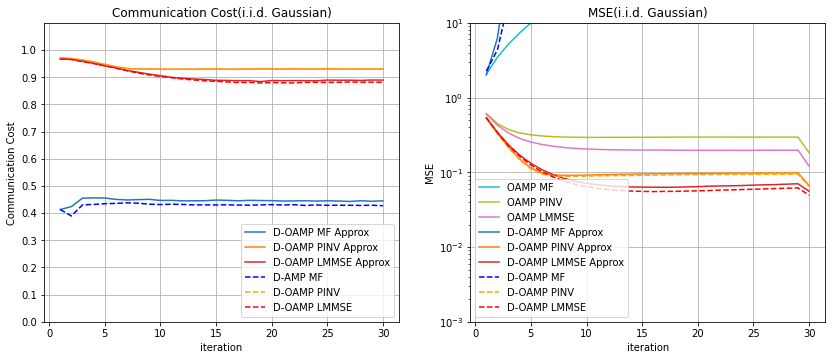

In [37]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt.title('Communication Cost(i.i.d. Gaussian)')
plt_CC(CommCost_UniInv_doampO_mean[0], 'D-OAMP MF Approx', T, N, P, 'tab:blue')
plt_CC(CommCost_UniInv_doampO_mean[1], 'D-OAMP PINV Approx', T, N, P, 'tab:orange')
plt_CC(CommCost_UniInv_doampO_mean[2], 'D-OAMP LMMSE Approx', T, N, P, 'tab:red')

plt_CC(CommCost_UniInv_doampX_mean[0], 'D-AMP MF', T, N, P, 'blue', '--')
plt_CC(CommCost_UniInv_doampX_mean[1], 'D-OAMP PINV', T, N, P, 'orange', '--')
plt_CC(CommCost_UniInv_doampX_mean[2], 'D-OAMP LMMSE', T, N, P, 'red', '--')
plt.grid()


plt.subplot(122)
plt.title('MSE(i.i.d. Gaussian)')
plt_MSE(MSE_UniInv_oamp_mean[0], 'OAMP MF', T, 'tab:cyan')
plt_MSE(MSE_UniInv_oamp_mean[1], 'OAMP PINV', T, 'tab:olive')
plt_MSE(MSE_UniInv_oamp_mean[2], 'OAMP LMMSE', T, 'tab:pink')

plt_MSE(MSE_UniInv_doampO_mean[0], 'D-OAMP MF Approx', T, 'tab:blue')
plt_MSE(MSE_UniInv_doampO_mean[1], 'D-OAMP PINV Approx', T, 'tab:orange')
plt_MSE(MSE_UniInv_doampO_mean[2], 'D-OAMP LMMSE Approx', T, 'tab:red')

plt_MSE(MSE_UniInv_doampX_mean[0], 'D-OAMP MF', T, 'blue', '--')
plt_MSE(MSE_UniInv_doampX_mean[1], 'D-OAMP PINV', T, 'orange', '--')
plt_MSE(MSE_UniInv_doampX_mean[2], 'D-OAMP LMMSE', T, 'red', '--')
plt.legend(loc="lower left")

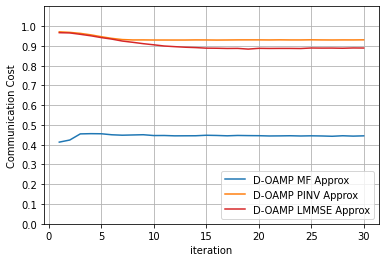

In [38]:
plt_CC(CommCost_UniInv_doampO_mean[0], 'D-OAMP MF Approx', T, N, P, 'tab:blue')
plt_CC(CommCost_UniInv_doampO_mean[1], 'D-OAMP PINV Approx', T, N, P, 'tab:orange')
plt_CC(CommCost_UniInv_doampO_mean[2], 'D-OAMP LMMSE Approx', T, N, P, 'tab:red')

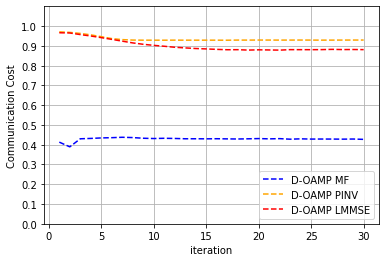

In [39]:
plt_CC(CommCost_UniInv_doampX_mean[0], 'D-OAMP MF', T, N, P, 'blue', '--')
plt_CC(CommCost_UniInv_doampX_mean[1], 'D-OAMP PINV', T, N, P, 'orange', '--')
plt_CC(CommCost_UniInv_doampX_mean[2], 'D-OAMP LMMSE', T, N, P, 'red', '--')

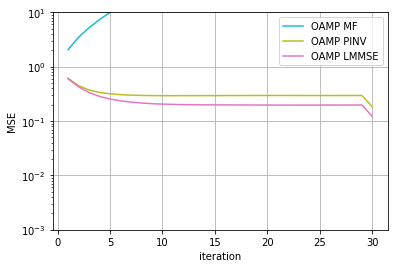

In [40]:
plt_MSE(MSE_UniInv_oamp_mean[0], 'OAMP MF', T, 'tab:cyan')
plt_MSE(MSE_UniInv_oamp_mean[1], 'OAMP PINV', T, 'tab:olive')
plt_MSE(MSE_UniInv_oamp_mean[2], 'OAMP LMMSE', T, 'tab:pink')

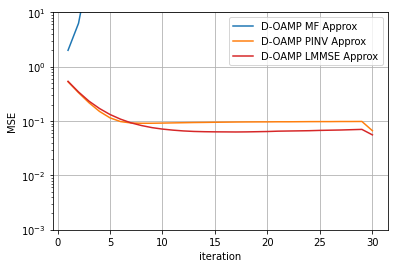

In [41]:
plt_MSE(MSE_UniInv_doampO_mean[0], 'D-OAMP MF Approx', T, 'tab:blue')
plt_MSE(MSE_UniInv_doampO_mean[1], 'D-OAMP PINV Approx', T, 'tab:orange')
plt_MSE(MSE_UniInv_doampO_mean[2], 'D-OAMP LMMSE Approx', T, 'tab:red')

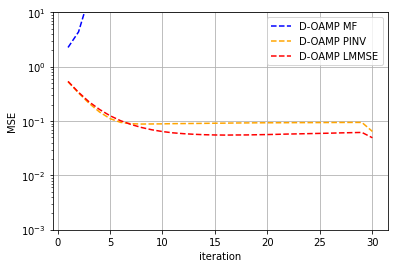

In [42]:
plt_MSE(MSE_UniInv_doampX_mean[0], 'D-OAMP MF', T, 'blue', '--')
plt_MSE(MSE_UniInv_doampX_mean[1], 'D-OAMP PINV', T, 'orange', '--')
plt_MSE(MSE_UniInv_doampX_mean[2], 'D-OAMP LMMSE', T, 'red', '--')

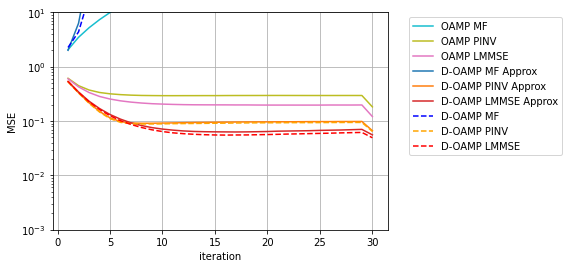

In [43]:
plt_MSE(MSE_UniInv_oamp_mean[0], 'OAMP MF', T, 'tab:cyan')
plt_MSE(MSE_UniInv_oamp_mean[1], 'OAMP PINV', T, 'tab:olive')
plt_MSE(MSE_UniInv_oamp_mean[2], 'OAMP LMMSE', T, 'tab:pink')

plt_MSE(MSE_UniInv_doampO_mean[0], 'D-OAMP MF Approx', T, 'tab:blue')
plt_MSE(MSE_UniInv_doampO_mean[1], 'D-OAMP PINV Approx', T, 'tab:orange')
plt_MSE(MSE_UniInv_doampO_mean[2], 'D-OAMP LMMSE Approx', T, 'tab:red')

plt_MSE(MSE_UniInv_doampX_mean[0], 'D-OAMP MF', T, 'blue', '--')
plt_MSE(MSE_UniInv_doampX_mean[1], 'D-OAMP PINV', T, 'orange', '--')
plt_MSE(MSE_UniInv_doampX_mean[2], 'D-OAMP LMMSE', T, 'red', '--')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

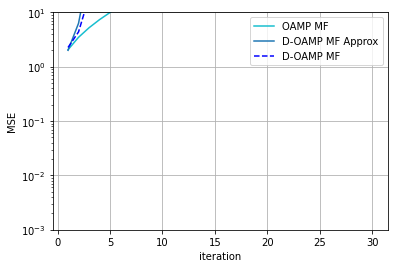

In [44]:
plt_MSE(MSE_UniInv_oamp_mean[0], 'OAMP MF', T, 'tab:cyan')
plt_MSE(MSE_UniInv_doampO_mean[0], 'D-OAMP MF Approx', T, 'tab:blue')
plt_MSE(MSE_UniInv_doampX_mean[0], 'D-OAMP MF', T, 'blue', '--')

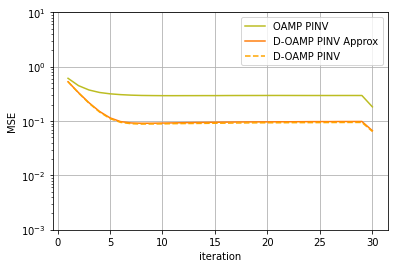

In [45]:
plt_MSE(MSE_UniInv_oamp_mean[1], 'OAMP PINV', T, 'tab:olive')
plt_MSE(MSE_UniInv_doampO_mean[1], 'D-OAMP PINV Approx', T, 'tab:orange')
plt_MSE(MSE_UniInv_doampX_mean[1], 'D-OAMP PINV', T, 'orange', '--')

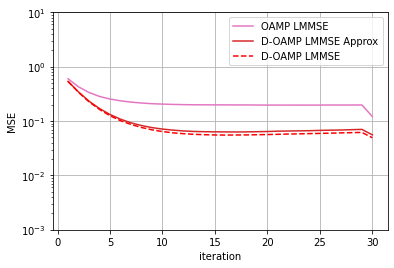

In [46]:
plt_MSE(MSE_UniInv_oamp_mean[2], 'OAMP LMMSE', T, 'tab:pink')
plt_MSE(MSE_UniInv_doampO_mean[2], 'D-OAMP LMMSE Approx', T, 'tab:red')
plt_MSE(MSE_UniInv_doampX_mean[2], 'D-OAMP LMMSE', T, 'red', '--')